# Taller Pandas (pd)
## Diplomado en IA y AP
## Universidad Nacional de Colombia
### Juan Pablo Mojica Macías

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
folder_path="/home/juanpablo/Documentos/Trabajos Diplomado/Talleres Diplomados/Taller Pandas/"

In [38]:
datos=pd.read_csv(folder_path+"DataPRSA.csv")
datos.head(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


## **1. Diga qué índices serían pertienentes tener y pongalos.**
Los índices que considero pertinete a extraer son **year**, **mounth**, **day** y **hour** y adicionalmete se procede a la eliminación de la columna **No**, para mejorar la presentación de la base de datos

In [39]:
PRSA_index=pd.read_csv(folder_path+"DataPRSA.csv",index_col=[1,2,3,4]).drop(['No'],axis=1)
display(PRSA_index)

pm2.5  DEWP  TEMP    PRES cbwd     Iws  Is  Ir
year month day hour                                                
2010 1     1   0       NaN   -21 -11.0  1021.0   NW    1.79   0   0
               1       NaN   -21 -12.0  1020.0   NW    4.92   0   0
               2       NaN   -21 -11.0  1019.0   NW    6.71   0   0
               3       NaN   -21 -14.0  1019.0   NW    9.84   0   0
               4       NaN   -20 -12.0  1018.0   NW   12.97   0   0
...                    ...   ...   ...     ...  ...     ...  ..  ..
2014 12    31  19      8.0   -23  -2.0  1034.0   NW  231.97   0   0
               20     10.0   -22  -3.0  1034.0   NW  237.78   0   0
               21     10.0   -22  -3.0  1034.0   NW  242.70   0   0
               22      8.0   -22  -4.0  1034.0   NW  246.72   0   0
               23     12.0   -21  -3.0  1034.0   NW  249.85   0   0

[43824 rows x 8 columns]

## **2. Elimine registros que tengan NA en la columna "pm2.5"**
Después de la creación de los indices, se procede a eliminar los valores NaN de la variable **pm2.5**. Obteniendo el siguiente resultado

In [40]:
PRSA_index=PRSA_index.dropna(subset=['pm2.5'])
display(PRSA_index)

pm2.5  DEWP  TEMP    PRES cbwd     Iws  Is  Ir
year month day hour                                                
2010 1     2   0     129.0   -16  -4.0  1020.0   SE    1.79   0   0
               1     148.0   -15  -4.0  1020.0   SE    2.68   0   0
               2     159.0   -11  -5.0  1021.0   SE    3.57   0   0
               3     181.0    -7  -5.0  1022.0   SE    5.36   1   0
               4     138.0    -7  -5.0  1022.0   SE    6.25   2   0
...                    ...   ...   ...     ...  ...     ...  ..  ..
2014 12    31  19      8.0   -23  -2.0  1034.0   NW  231.97   0   0
               20     10.0   -22  -3.0  1034.0   NW  237.78   0   0
               21     10.0   -22  -3.0  1034.0   NW  242.70   0   0
               22      8.0   -22  -4.0  1034.0   NW  246.72   0   0
               23     12.0   -21  -3.0  1034.0   NW  249.85   0   0

[41757 rows x 8 columns]

## **3. Realice un describe de todas las variables por año. Además de realizar un gráfico como boxplot con el que pueda comparar los resultados dados**

In [41]:
PRSA_index.groupby('year')[['pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']].describe()

pm2.5                                                          DEWP  \
       count        mean        std  min   25%   50%    75%    max   count   
year                                                                         
2010  8091.0  104.045730  92.281185  1.0  35.0  79.0  147.0  980.0  8091.0   
2011  8032.0   99.071340  92.967298  2.0  27.0  71.0  139.0  595.0  8032.0   
2012  8295.0   90.545871  81.745087  0.0  25.0  69.0  132.0  994.0  8295.0   
2013  8678.0  101.712376  98.070477  2.0  32.0  71.5  138.0  886.0  8678.0   
2014  8661.0   97.734557  93.531528  2.0  28.0  72.0  133.0  671.0  8661.0   

                ...   Is            Ir                                     \
          mean  ...  75%   max   count      mean       std  min  25%  50%   
year            ...                                                         
2010  1.352120  ...  0.0  27.0  8091.0  0.269312  1.836257  0.0  0.0  0.0   
2011  2.033118  ...  0.0  20.0  8032.0  0.149278  1.110730  0.0  0.0  0.0   
2012  1.953707  ...  0.0  19.0  8295.0  0.265943  1.766490  0.0  0.0  0.0   
2013  1.342590  ...  0.0  11.0  8678.0  0.161904  1.150911  0.0  0.0  0.0   
2014  2.073086  ...  0.0  23.0  8661.0  0.132548  1.034723  0.0  0.0  0.0   

                 
      75%   max  
year             
2010  0.0  36.0  
2011  0.0  23.0  
2012  0.0  32.0  
2013  0.0  25.0  
2014  0.0  23.0  

[5 rows x 56 columns]

In [42]:
PRSA_index1=pd.read_csv(folder_path+"DataPRSA.csv",index_col=[1]).drop(['No'],axis=1)
PRSA_index1=PRSA_index1.dropna(subset=['pm2.5'])
#display(PRSA_index1)

In [43]:
PRSA_index2=PRSA_index1.iloc[:,[3,4,5,6,8]]
#display(PRSA_index2)

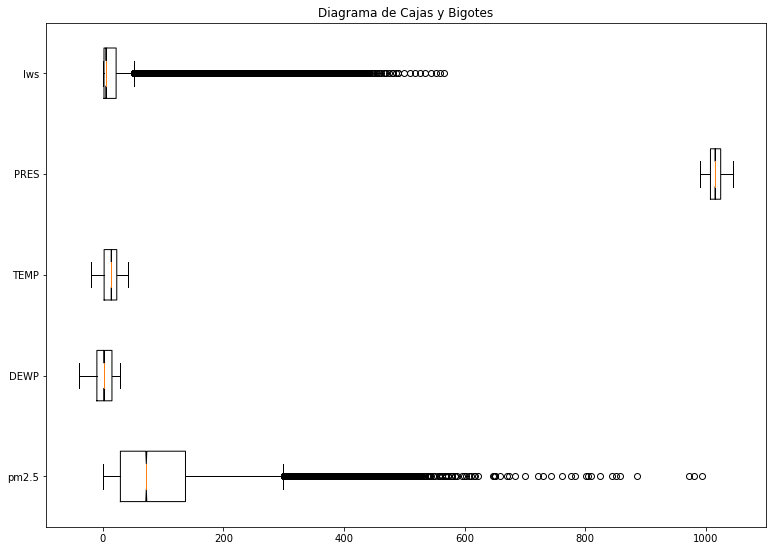

In [44]:
labels=['pm2.5','DEWP','TEMP','PRES','Iws']
fig=plt.figure(figsize=(10,7))
ax=fig.add_axes([0,0,1,1])
bp=ax.boxplot(PRSA_index2,labels=labels, notch='True',vert=0)
ax.set_title('Diagrama de Cajas y Bigotes')
plt.show(bp)

Se muestran los diagramas de cajas y bigotes por cada una de la variables agrupadas por año

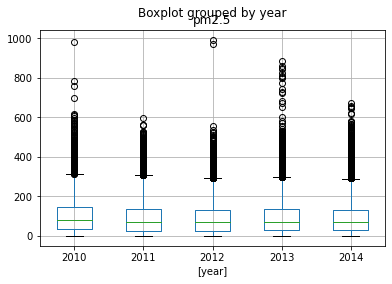

In [45]:
PM2_5=datos.loc[:,['year','pm2.5']].dropna(subset=['pm2.5'])
PM2_5.head()
PM2_5.boxplot(by='year')
plt.show()

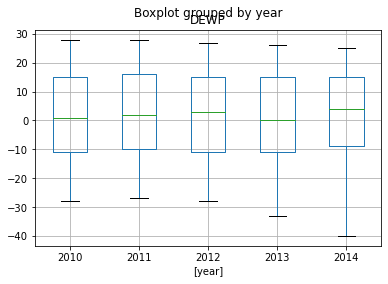

In [46]:
DEWP=datos.dropna(subset=['pm2.5'])
DEWP=DEWP.loc[:,['year','DEWP']]
DEWP.head()
DEWP.boxplot(by='year')
plt.show()

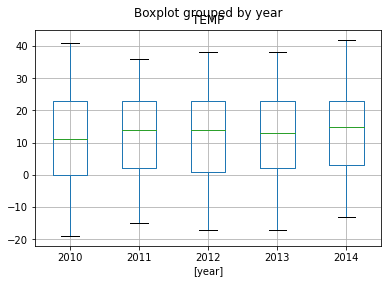

In [47]:
TEMP=datos.dropna(subset=['pm2.5'])
TEMP=TEMP.loc[:,['year','TEMP']]
TEMP.head()
TEMP.boxplot(by='year')
plt.show()

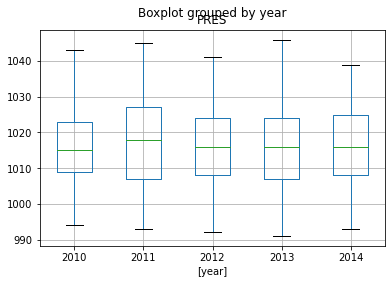

In [48]:
PRES=datos.dropna(subset=['pm2.5'])
PRES=PRES.loc[:,['year','PRES']]
PRES.head()
PRES.boxplot(by='year')
plt.show()

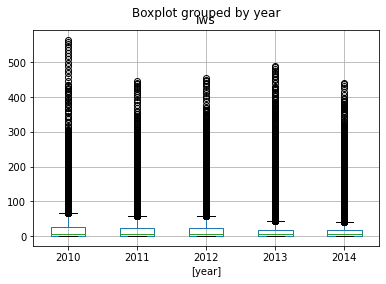

In [49]:
Iws=datos.dropna(subset=['pm2.5'])
Iws=Iws.loc[:,['year','Iws']]
Iws.head()
Iws.boxplot(by='year')
plt.show()

## **4. Realice un gráfico de disperción de las variables "pm2.5" y "TEMP" con título, labels apropiados y color rojo para los datos**

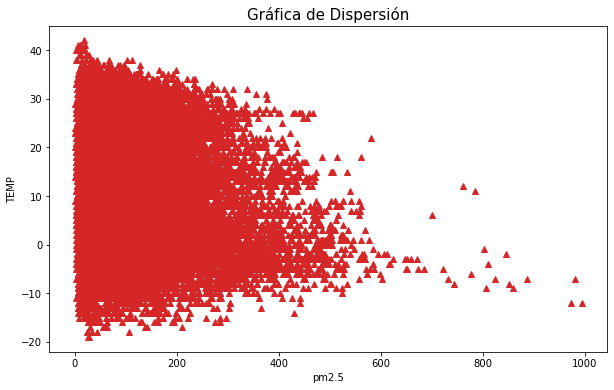

In [50]:
datos1=datos.dropna(subset=['pm2.5'])
y=datos1['TEMP']
x=datos1['pm2.5']

plt.figure(figsize=(10,6))
plt.plot(x,y,'^',color='tab:red',alpha=1)
plt.title('Gráfica de Dispersión',fontdict={'fontsize':15})
plt.ylabel('TEMP')
plt.xlabel('pm2.5')
plt.show()

* La mayor cantidad de datos es menor que 500 pm2.5
* El gráfico de dispersión no presenta un patrón conocido
* Parece que a mayor pm2.5 el valor de temperatura disminuye

## **5. Calcule la probabilidad de encontrar en la Base de datos el valor de pm2.5 encima de 120**

In [51]:
cf=datos1[datos1['pm2.5']>120].shape[0]
N=datos1.shape[0]
prob=cf/N
print('La Probabilidad de que pm2.5 se mayor quw 120 es=', prob)

La Probabilidad de que pm2.5 se mayor quw 120 es= 0.2989438896472448


## **6. Para finalizar, agrupe por año el valor de la variable "pm2.5", calcule el promedio y ordene la base de datos de manera ascendente por el promedo**

In [52]:
promedio=datos1.groupby('year')[['pm2.5']].mean()
display(promedio)

,pm2.5
year,
2010,104.045730
2011,99.071340
2012,90.545871
2013,101.712376
2014,97.734557
